In [1]:
import sncosmo
import analyzeSN as ans
from analyzeSN import LightCurve

In [2]:
import pandas as pd
import numpy as np

In [3]:
!ls *.ascii

lc_field309_mjd_49923.ascii lc_field744_mjd_49923.ascii


In [4]:
fname = 'lc_field744_mjd_49923.ascii'

In [5]:
lcdf = pd.read_csv(fname, delim_whitespace=True)

In [6]:
lcdf.head()

,index,time,band,flux,fluxerr,zp,zpsys,SNR,finSeeing,airmass,filtSkyBrightness,fiveSigmaDepth,propID,night,DetectionEfficiency,modelFlux,deviation
0,416373,49921.234141,r,8.922394e-10,3.173156e-11,0.0,ab,28.118357,0.705636,1.286271,21.094100,24.579716,366,568,0.987746,8.922394e-10,1.764052
1,416372,49921.233713,r,8.922386e-10,3.177184e-11,0.0,ab,28.082686,0.706165,1.288225,21.092869,24.578092,366,568,0.987726,8.922386e-10,0.400157
2,416371,49921.233285,r,8.922378e-10,3.181244e-11,0.0,ab,28.046824,0.706698,1.290191,21.091633,24.576458,366,568,0.987706,8.922378e-10,0.978738
3,416370,49921.232857,r,8.922370e-10,3.185325e-11,0.0,ab,28.010859,0.707233,1.292167,21.090392,24.574818,366,568,0.987686,8.922370e-10,2.240893
4,416369,49921.232428,r,8.922362e-10,3.189429e-11,0.0,ab,27.974791,0.707771,1.294155,21.089148,24.573172,366,568,0.987666,8.922362e-10,1.867558


In [7]:
banddict = dict((x, 'lsst_' + x) for x in 'ugrizy')

In [8]:
lightcurve = LightCurve(lcdf[['time', 'flux', 'band', 'fluxerr','zp', 'zpsys', 'SNR']], bandNameDict=banddict)

In [9]:
lightcurve.lightCurve.head()

,mjd,flux,band,fluxerr,zp,zpsys,SNR
0,49921.234141,8.922394e-10,lsst_r,3.173156e-11,0.0,ab,28.118357
1,49921.233713,8.922386e-10,lsst_r,3.177184e-11,0.0,ab,28.082686
2,49921.233285,8.922378e-10,lsst_r,3.181244e-11,0.0,ab,28.046824
3,49921.232857,8.922370e-10,lsst_r,3.185325e-11,0.0,ab,28.010859
4,49921.232428,8.922362e-10,lsst_r,3.189429e-11,0.0,ab,27.974791


In [10]:
lightcurve.coaddedLC().head()

,mjd,flux,band,fluxerr,zp,zpsys,SNR
0,49921.234141,8.922394e-10,lsst_r,3.173156e-11,0.0,ab,28.118357
1,49921.233713,8.922386e-10,lsst_r,3.177184e-11,0.0,ab,28.082686
2,49921.233285,8.922378e-10,lsst_r,3.181244e-11,0.0,ab,28.046824
3,49921.232857,8.922370e-10,lsst_r,3.185325e-11,0.0,ab,28.010859
4,49921.232428,8.922362e-10,lsst_r,3.189429e-11,0.0,ab,27.974791


In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

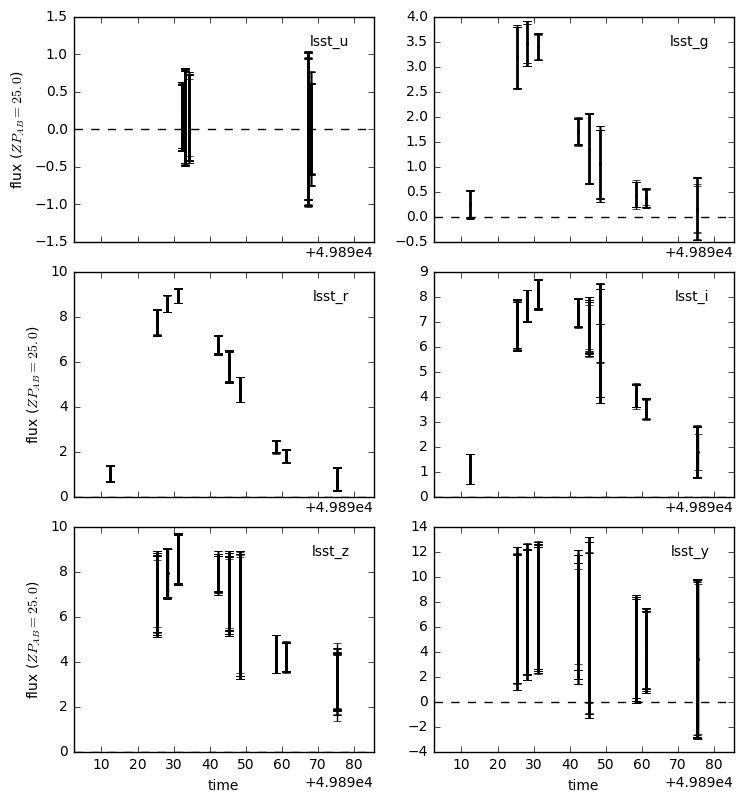

In [12]:
fig = sncosmo.plot_lc(lightcurve.snCosmoLC(), color='k')

If you want to plot the model

In [13]:
from lsst.sims.catUtils.supernovae import SNObject

In [14]:
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=73., Om0=0.25)

In [15]:
snobject = SNObject(ra=0., dec=np.degrees(0.794553))
paramDict = dict(x1=0., z=0.5, c=0., t0=49923.)
mwebv = snobject.ebvofMW
#snobject.set_MWebv(0.)
snobject.set(**paramDict)
snobject.set_source_peakabsmag(-19.3, 'BessellB', 'AB')
snobject.set_MWebv(0.)
sncosmoModel = snobject.equivalentSNCosmoModel()

In [16]:
print sncosmoModel

source:
  class      : SALT2Source
  name       : 'salt2-extended'
  version    : 1.0
  phases     : [-20, .., 50] days
  wavelengths: [300, .., 18000] Angstroms
effect (name='host' frame='rest'):
  class           : OD94Dust
  wavelength range: [909.09, 33333.3] Angstroms
effect (name='mw' frame='obs'):
  class           : OD94Dust
  wavelength range: [909.09, 33333.3] Angstroms
parameters:
  z       = 0.5
  t0      = 49923.0
  x0      = 1.0068661711630977e-05
  x1      = 0.0
  c       = 0.0
  hostebv = 0.0
  hostr_v = 3.1000000000000001
  mwebv   = 0.0
  mwr_v   = 3.1000000000000001


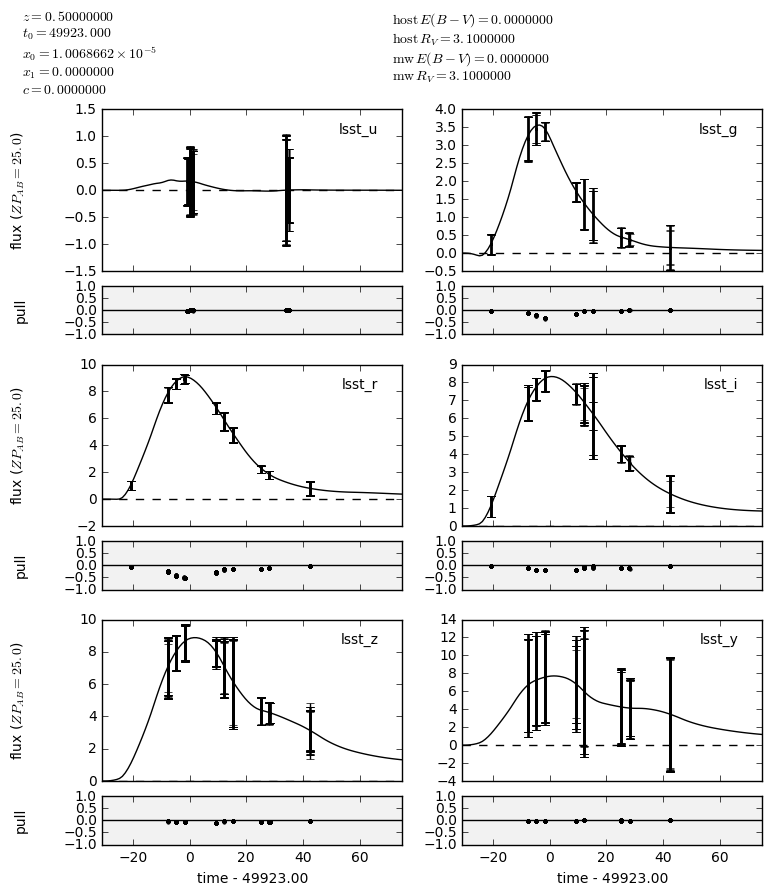

In [17]:
fig = sncosmo.plot_lc(lightcurve.snCosmoLC(), color='k', model=sncosmoModel)